In [1]:
from helpers.helper_module import pd, plt, np, sm
from helpers.helper_functions import readCSV
from helpers.database_helpers import *


# Constants
JOB_OTHER_6 = "job+other6"
JOB_ONLY = "job_only"

# Configuration
ANALYSIS_TYPE = JOB_ONLY  # Change this to switch between analysis types

# Load data
if ANALYSIS_TYPE == JOB_OTHER_6:
    df = readCSV('../Data/hexData+job_other6_demand-001.csv')
elif ANALYSIS_TYPE == JOB_ONLY:
    df = readCSV('../Data/hexData_v02c3+job.csv')

c:\Users\hh080\Desktop\forEDUC\Codebase\helpers\helper_functions.py:388: DtypeWarning: Columns (9,11,53) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(fileName, encoding=theEncoding, usecols=useCols, dtype=dtypes, names=theColNames, header=theHeader).fillna(fillNaN)


In [2]:
print(f"Data shape of \"{ANALYSIS_TYPE}\": {df.shape}") # job+other6: (1030936, 192) / job_only: (1030936, 123)
df.head()

Data shape of "job_only": (1030936, 123)


,id,ms_rent_stories.id,normalized_name,matching_status,address_lowest_level,normalized_address,prefecture,city_ward,town,street,block,number,subnumber,lat_x,lon_x,data_type,property_type,property_event,building_name,line_name_1,station_name_1,station_walk_minutes_1,station_walk_meters_1,rent,key_money_amount,deposit_amount,surface_area,management_fee,service_fee,floor_plan_type,floor_plan_number_of_rooms,building_structure,building_floors,basement_floors,room_floor,balcony_direction,geometry_x,built_year,built_month,age_in_months,age_in_years,rent_per_square_meter,log_rent_per_square_meter,adj_rent,adj_rent_per_square_meter,log_adj_rent_per_square_meter,hex_id,geometry_y,point,lat_y,lon_y,pointMap,modality,connected,reachable_hexes_15min,closest_station_id,closest_station_name,closest_station_nameEN,closest_station_time,nearby_stations,num_nearby_stations,reachable_stations,demand_linear-60,demand_linear-90,demand_sCurve-60_05,demand_sCurve-60_10,demand_sCurve-60_20,demand_sCurve-90_05,demand_sCurve-90_10,demand_sCurve-90_20,companies_AR_all_est,employees_AR_all_est,sourceJobs,land_use=agriculture,land_use=beach,land_use=facility,land_use=factory,land_use=forest,land_use=golf,land_use=high-rise building,land_use=low-rise dense,land_use=low-rise sparse,land_use=park,land_use=rail,land_use=rice field,land_use=road,land_use=sea,land_use=vacant,land_use=wasteland,land_use=water,meanBuildingSurfaceArea,numBuildings,percentBuildingSurfaceArea,pop_Total_A_est,store_score,total_relevant_stores,total_stores,veg=development,veg=factory,veg=field,veg=forest_grassland,veg=green_residential,veg=lawn,veg=other,veg=park_cemetery,veg=urban,veg=vacant,zone_cat=commercial,zone_cat=industrial,zone_cat=residential_1,zone_cat=residential_2,zone_type=commercial,zone_type=industrial,zone_type=industrial_specific,zone_type=neighborhood_commercial,zone_type=residential_class1,zone_type=residential_class1_highrise,zone_type=residential_class1_lowrise,zone_type=residential_class2,zone_type=residential_class2_highrise,zone_type=residential_class2_lowrise,zone_type=semi-industrial,zone_type=semi-residential
0,175260081,40359710,セントラルパークタワーラトウール新宿,matched,full,東京都新宿区西新宿6丁目15-1,東京都,新宿区,西新宿,6,15.0,1.0,,35.692133,139.688636,3,3,1,セントラルパークタワー・ラ・トゥール新宿,大江戸線,都庁前,5.0,,396000,0,792000,62.40,0,0,5,1,3,44,0,21,0,POINT (139.6886356800000044 35.6921330799999978),2010,2,166,13,6346.153846,8.755604,396000,6346.153846,8.755604,-34_7,POLYGON ((139.6891495746907310 35.693163310051...,POINT (139.68914957469073 35.69211024235592),35.69211,139.68915,POINT (15550125 4258338.5),hex,True,58.0,7786715968.0,西新宿,Nishi-shinjuku,7.78,"{'西新宿': 7.72, '都庁前': 7.92, '西新宿五丁目': 8.04}",3.0,"{'7786715968': 7.78, '7761779877': 8.11, '6203...",2264276.0,4879128.0,744175.0,1852031.0,3615210.0,2000969.0,4563273.0,7655390.0,119.9,6293.2,0.0,,,,,0.208,,0.717,,,,,,0.075,,,,,772.4,12.0,0.26,432.2,82.903579,5.0,8.0,,,,,,,,0.228,0.772,,0.73,,0.27,,0.73,,,,0.27,,,,,,,
1,174768369,40109062,目黒区中町1丁目戸建,matched,full,東京都目黒区中町1丁目1-1,東京都,目黒区,中町,1,1.0,1.0,,35.633547,139.698496,3,3,1,目黒区中町1丁目戸建,東横線,学芸大学,14.0,,380000,760000,760000,141.46,0,0,9,2,1,1,0,1,4,POINT (139.6984961599999906 35.6335466700000012),1994,2,358,29,2686.271738,7.895910,411667,2910.130072,7.975953,-30_-30,POLYGON ((139.6992556216370645 35.634699730868...,POINT (139.69925562163706 35.6336458917963),35.633646,139.699256,POINT (15551249.999999998 4250328.000000001),hex,True,53.0,6254457082.0,祐天寺,Yutenji,17.64,{},0.0,"{'6254457082': 17.64, '6254460285': 23.57, '24...",922296.0,3372948.0,167317.0,510247.0,1296844.0,1024472.0,2778310.0,5568857.0,17.3,117.2,0.0,,,,,,,,1.0,,,,,,,,,,73.7,234.0,0.483,766.6,14.822269,1.0,3.0,,,,,,,,,1.0,,0.161,,0.839,,,,,0.161,,0.0,0.839,,,,,
2,174770121,40199102,モノテイーワンハウス,matched,full,神奈川県平塚市平塚5丁目21-26,神奈川県,平塚市,平塚,5,21.0,26.0,,35.328503,139.329978,3,3,1,ＭＯＮＯーＴｏｎｅ ＨＯＵＳＥ,湘南新宿高,平塚,24.0,,95000,142500,0,52.98,5000,0,5,2,4,5,0,2,6,POINT (139.3299775399999874 35.3285034999999965),2015,3,105,8,1793.129483,7.491718,105938,1999.58

In [3]:
# Define variables for analysis
if ANALYSIS_TYPE == JOB_OTHER_6:
    independent_vars = [
        'demand_linear-90',
        'demandHospital_linear-60',
        'demandUniversity_sCurve-90_05',
        'demandTheater_linear-90',
        'demandStore_linear-60',
        'demandStadium_linear-60',
        'demandAirport_linear-90'
    ]
elif ANALYSIS_TYPE == JOB_ONLY:
    independent_vars = ['demand_linear-90']

dependent_var = 'log_adj_rent_per_square_meter'

def clean_and_convert_to_float(val):
    """Convert input to float, handling NaN and empty strings."""
    if pd.isna(val) or val == '':
        return np.nan
    try:
        return float(val)
    except ValueError:
        print(f"Warning: Could not convert '{val}' to float.")
        return np.nan

# Clean and prepare data
for col in independent_vars + [dependent_var]:
    df[col] = df[col].apply(clean_and_convert_to_float)

mask = ~(df[independent_vars + [dependent_var]].isna().any(axis=1))
df_cleaned = df.loc[mask, independent_vars + [dependent_var]]

# Perform OLS regression
model = sm.OLS(df_cleaned[dependent_var], df_cleaned[independent_vars])
results = model.fit()
print(results.summary())

                                      OLS Regression Results                                      
Dep. Variable:     log_adj_rent_per_square_meter   R-squared (uncentered):                   0.812
Model:                                       OLS   Adj. R-squared (uncentered):              0.812
Method:                            Least Squares   F-statistic:                          4.466e+06
Date:                           Fri, 01 Nov 2024   Prob (F-statistic):                        0.00
Time:                                   20:30:00   Log-Likelihood:                     -2.7366e+06
No. Observations:                        1030872   AIC:                                  5.473e+06
Df Residuals:                            1030871   BIC:                                  5.473e+06
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
          

Analysis Configuration and Results Summary

1. Job + Other 6 Variables Analysis
   Variables:
   - Jobs: linear 90
   - Hospital: linear 60
   - University: s-curve 90-05
   - Theater: linear 90
   - Store: linear 60
   - Stadium: linear 60
   - Airport: linear 90

R-squared: 0.923

2. Job Only Analysis
   Variables:
   - Jobs: linear 90
R-squared: 0.812

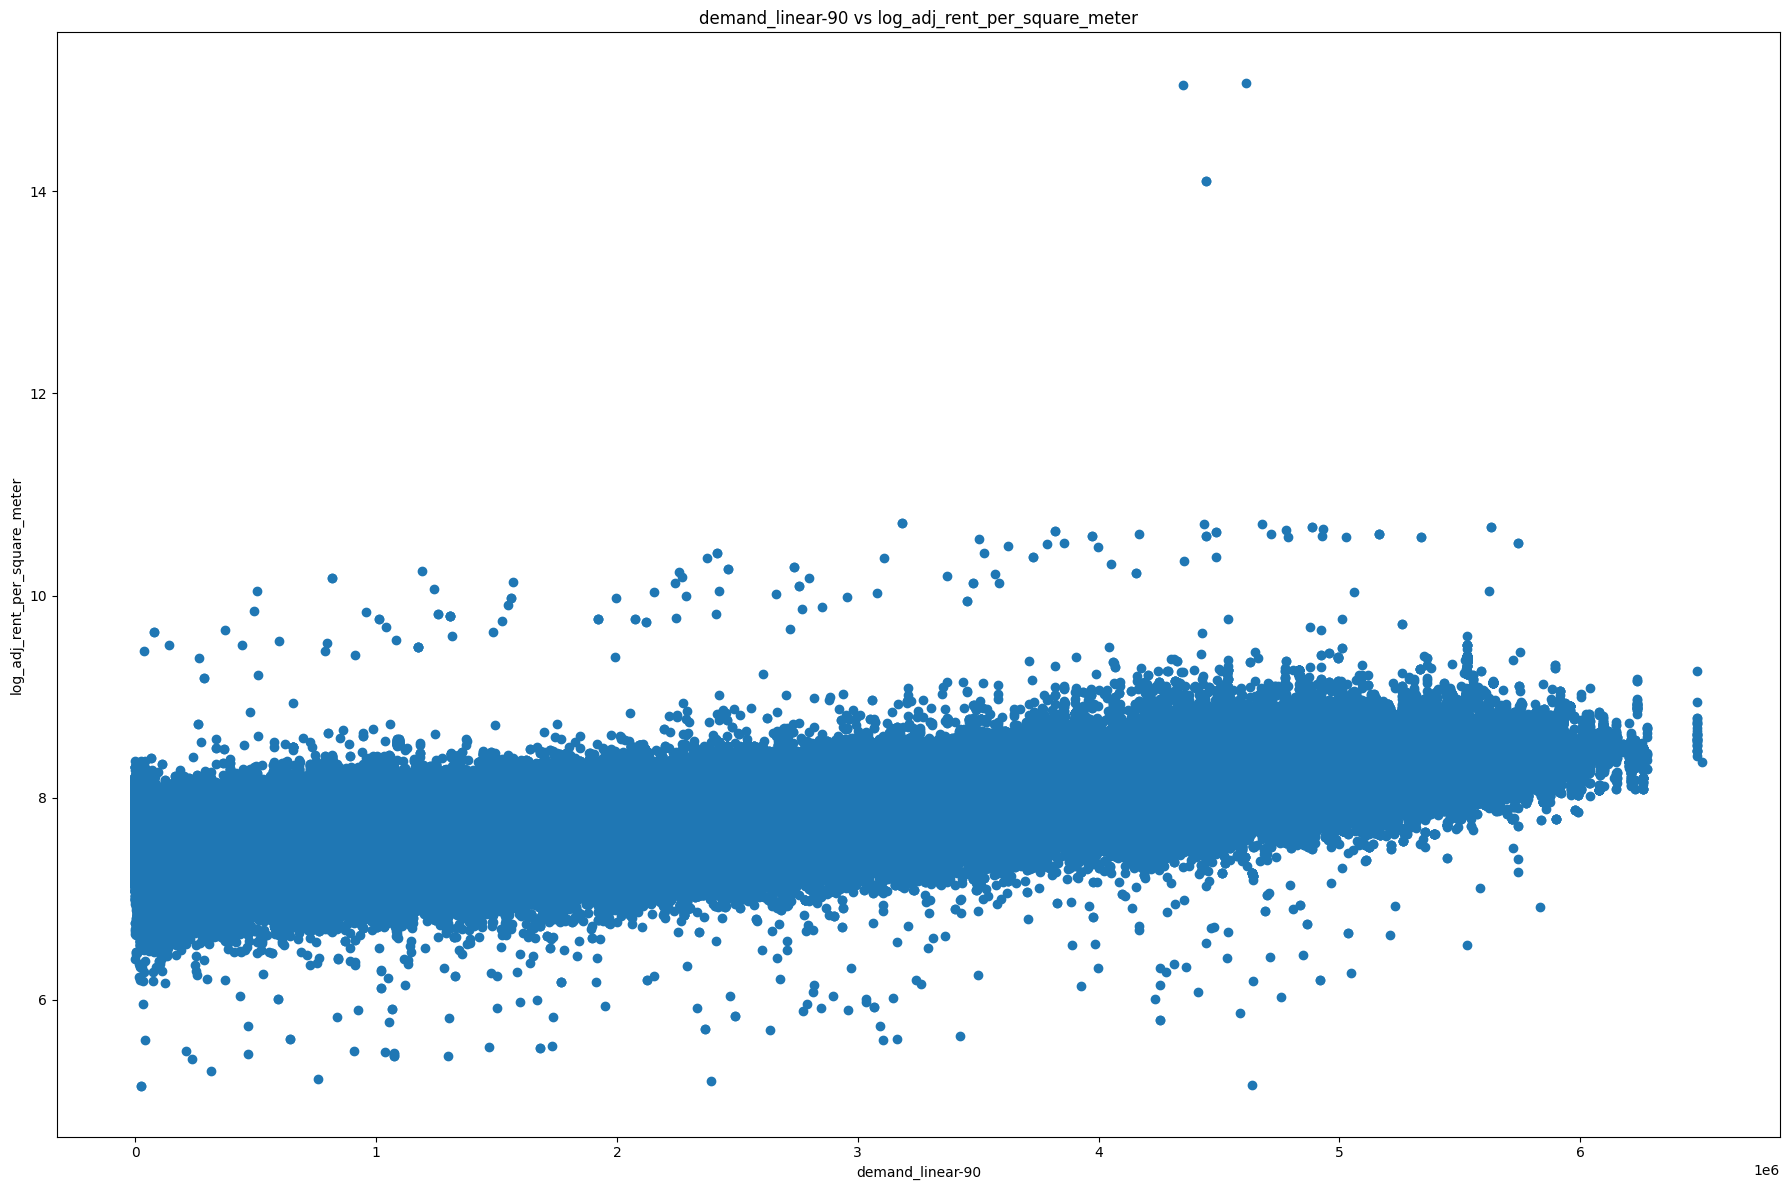

In [4]:
# Visualize results
if ANALYSIS_TYPE == JOB_OTHER_6:
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    axes = axes.flatten()
elif ANALYSIS_TYPE == JOB_ONLY:
    fig, ax = plt.subplots(1, 1, figsize=(18, 12))
    axes = [ax]

for i, col in enumerate(independent_vars):
    if i < len(axes):
        axes[i].scatter(df_cleaned[col], df_cleaned[dependent_var])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(dependent_var)
        axes[i].set_title(f'{col} vs {dependent_var}')
    else:
        break

plt.tight_layout()
plt.show()